### Question 6

solution from Chaolun

#### a)
denote $S=\frac{K}{pc}$, we can disrcetize the given heat equation using finite difference method, forward euler was used in time descretization. Choose spatial step size to be 10(m), temporal stepsize to be $3.154*10^7$(s),which is one year. We have:
$$
\frac{T_i^{k+1}-T_i^{k}}{\Delta t}=S\frac{T_{i-1}^k-2T_i^k+T_{i+1}^k}{\Delta z^2}
$$
where i=0,1,2...100, k=0,1,2..., $\Delta z=10(m)$, $\Delta t=1(year)$

The boundary condition is given as:
$$
T_0^k=T_{surface}
$$
$$
q=\frac{T^k_{101}-T^k_{99}}{\Delta Z}
$$
So for each time steps, we can update the solution by:
$$
T_{0}^{k+1}=T_{surface} (k=1,2,...)
$$
$$
T_i^{k+1}=\frac{\Delta t S}{\Delta z^2}(T_{i-1}^k-2T_i^k+T_{i+1}^k)+T_i^k \space\space\space(i=1,....99;\space k=1,2,...)
$$

$$
T_{100}^{k+1}=\frac{\Delta t S}{\Delta z^2}(2T_{99}^k-2T_{100}^k+\Delta z q)+T_{100}^k \space\space\space(k=1,2,...)
$$
where $S=10^{-6} (m^2 s^{-1})$, $q=0.015(^0Cm^{-1})$, with the given initial condition $T_i^0\space\space(i=1,2...100)$

The grid spacing was determined to balance the accuracy(the error is second order in space $O(\Delta z^2)$) and comptational cost. Also according to von Neumann stability analysis(referred from class powerpoint, lecture 22 page 6, or wikipedia), we can have the stability condition given by:
$$
\Delta t<\frac{(\Delta z)^2}{2S}\space\space
$$
so as long as $\Delta t<5*10^{7}(s)$ the method will be stable.
The code was shown in b) and c)

#### b)
the result become stabe when running 100000 time steps. We can see that the heat diffusion undergound is quite slow.

[-15.         -14.92499764 -14.84999528 -14.77499293 -14.69999057
 -14.62498822 -14.54998587 -14.47498353 -14.39998118 -14.32497885
 -14.24997652 -14.17497419 -14.09997188 -14.02496956 -13.94996726
 -13.87496497 -13.79996268 -13.72496041 -13.64995814 -13.57495588
 -13.49995364 -13.42495141 -13.34994919 -13.27494698 -13.19994479
 -13.1249426  -13.04994044 -12.97493829 -12.89993615 -12.82493403
 -12.74993193 -12.67492984 -12.59992777 -12.52492572 -12.44992369
 -12.37492168 -12.29991969 -12.22491771 -12.14991576 -12.07491383
 -11.99991192 -11.92491003 -11.84990816 -11.77490632 -11.6999045
 -11.62490271 -11.54990093 -11.47489919 -11.39989746 -11.32489577
 -11.2498941  -11.17489245 -11.09989084 -11.02488925 -10.94988768
 -10.87488615 -10.79988464 -10.72488316 -10.64988171 -10.57488029
 -10.4998789  -10.42487754 -10.34987621 -10.27487491 -10.19987365
 -10.12487241 -10.04987121  -9.97487003  -9.89986889  -9.82486778
  -9.74986671  -9.67486566  -9.59986465  -9.52486368  -9.44986274
  -9.374861

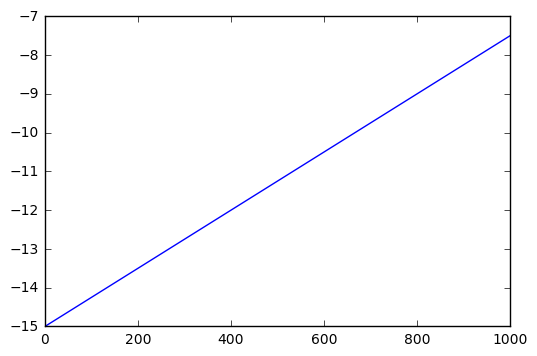

In [29]:
import numpy as np
from matplotlib.pyplot import *

m=101
n=100000
Tsurface=-15
s=0.000001
q=0.015
dz=10
dt=3.154*10000000  #seconds in one year
t=np.zeros([m])
t[0]=Tsurface
z=np.linspace(0,1000,101)

for i in range(n):
    tnew=t
    for j in range(m):
        if j==0:
            tnew[j]=Tsurface
        elif j==m-1:
            tnew[j]=dt*s/(dz*dz)*(2*t[j-1]-2*t[j]+dz*q)+t[j]
        else:
            tnew[j]=dt*s/(dz*dz)*(t[j-1]-2*t[j]+t[j+1])+t[j]
    t=tnew

print(t)
plot(z,t)
show()

#### c)
According with the question, we have:
$$
T_{surface}=k*\Delta t*\Delta T_{surface} +T_{inital}
$$
where $k=1,2,3..$, which indicates the number of years, $\Delta t$ is the step size, which is 1 (year), $T_{initial}=-15$, $\Delta T_{surface}=0.035$, the other condition stays the same as in a). The computation was done for 10 centuries

[[-15.         -14.92499764 -14.84999528 ...,  -7.64985071  -7.57485067
   -7.49985066]
 [-11.535      -11.98586575 -12.36997012 ...,  -7.6498524   -7.57485235
   -7.49985234]
 [ -8.035       -8.72702065  -9.3495881  ...,  -7.64985407  -7.57485402
   -7.49985401]
 ..., 
 [ 12.965       11.44994411  10.0075979  ...,  -7.64735367  -7.57242117
   -7.49743548]
 [ 16.465       14.85010443  13.30810495 ...,  -7.64362237  -7.56876137
   -7.49379084]
 [ 19.965       18.25567471  16.61940321 ...,  -7.63654528  -7.56179563
   -7.48684873]]


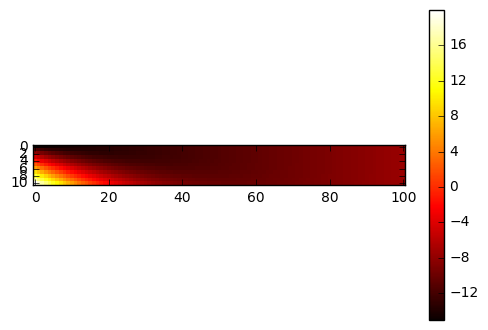

In [30]:
result=np.zeros([11,101])
for i in range(1001):
    tnew=t
    if i%100==0:
        result[int(np.floor(i/100))]=tnew    
    for j in range(m):
        if j==0:
            tnew[j]=i*0.035-15.0
        elif j==m-1:
            tnew[j]=dt*s/(dz*dz)*(2*t[j-1]-2*t[j]+dz*q)+t[j]
        else:
            tnew[j]=dt*s/(dz*dz)*(t[j-1]-2*t[j]+t[j+1])+t[j]
    t=tnew
print(result)
heatmap=imshow(result, cmap='hot', interpolation='nearest')
colorbar(heatmap)
show()